# M.ª de los Ángeles Martín de la Cruz

# **Ejemplo 2_4:** Determinación de observaciones influyentes: método de jackknife

24_25

---



**PROBLEMA**: Queremos averiguar si existe algún dato  influyente para los procedimientos estadísticos de calcular la **media** y la **mediana**.
> Vamos a generar una muestra simulando los ingresos de un barrio/población. Supongamos que hay un vecino con unos ingresos signficativamente altos.



In [ ]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Generación de datos
# ==============================================================================
# Generamos (100 elementos) ingresos uniformemente distribuidos en [15000,25000]
datos = 15000+np.random.rand(100)*10000
datos_ord = datos
datos_ord.sort()
datos

array([15086.48193632, 15285.37787077, 15295.15791884, 15331.97603901,
       15430.46986959, 15539.14313435, 15698.5083135 , 15789.3363136 ,
       15885.48737529, 15983.41342126, 16141.63718199, 16184.38778775,
       16297.81093975, 16422.40775308, 16426.96070612, 16527.04134189,
       16709.15906666, 16941.98247629, 17042.50560427, 17046.40637667,
       17057.76161035, 17086.33532948, 17145.98727502, 17410.0337853 ,
       17567.18809617, 17596.60905522, 17604.39695944, 17647.08661909,
       17957.23273395, 18339.61954793, 18411.00022359, 18510.62496332,
       18747.88473336, 19047.59461806, 19081.9346438 , 19107.04971013,
       19241.99460681, 19296.82858111, 19299.60658355, 19361.96058497,
       19426.826941  , 19434.56324369, 19459.34816103, 19520.70658694,
       19804.1896137 , 20194.77681806, 20336.27859886, 20369.32679639,
       20420.00307873, 20527.24681931, 20533.95491609, 20555.32841676,
       20577.27742653, 20626.45700854, 20674.91629169, 20718.98134425,
      

**Ejercicio**: Calcular la media y la mediana antes de realizar la modificación de incluir unos ingresos de 500.000€

In [ ]:
# Calculo de la media y la mediana antes del cambio.
media_antes=  np.mean(datos)
mediana_antes=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media_antes} y Mediana={mediana_antes}")

# Resumen estadístico antes del cambio
df = pd.DataFrame(datos, columns=["Ingresos"])
resumen_antes = df.describe()
print("\nResumen estadístico antes del cambio:\n", resumen_antes)

 Media= 20298.093345917856 y Mediana=20530.600867699985

Resumen estadístico antes del cambio:
            Ingresos
count    100.000000
mean   20298.093346
std     3014.556289
min    15086.481936
25%    17589.253815
50%    20530.600868
75%    22950.213522
max    24871.416221


In [ ]:
# Simulamos (porque se lo asignamos en la siguiente línea) que el vecino 50 tiene unos ingresos significativamente mayores que el resto
datos[50]=500000
datos

array([ 15086.48193632,  15285.37787077,  15295.15791884,  15331.97603901,
        15430.46986959,  15539.14313435,  15698.5083135 ,  15789.3363136 ,
        15885.48737529,  15983.41342126,  16141.63718199,  16184.38778775,
        16297.81093975,  16422.40775308,  16426.96070612,  16527.04134189,
        16709.15906666,  16941.98247629,  17042.50560427,  17046.40637667,
        17057.76161035,  17086.33532948,  17145.98727502,  17410.0337853 ,
        17567.18809617,  17596.60905522,  17604.39695944,  17647.08661909,
        17957.23273395,  18339.61954793,  18411.00022359,  18510.62496332,
        18747.88473336,  19047.59461806,  19081.9346438 ,  19107.04971013,
        19241.99460681,  19296.82858111,  19299.60658355,  19361.96058497,
        19426.826941  ,  19434.56324369,  19459.34816103,  19520.70658694,
        19804.1896137 ,  20194.77681806,  20336.27859886,  20369.32679639,
        20420.00307873,  20527.24681931, 500000.        ,  20555.32841676,
        20577.27742653,  

Cálculo de media y mediana en toda la muestra

In [ ]:
media=  np.mean(datos)
mediana=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media} y Mediana={mediana}")

 Media= 25092.75379675695 y Mediana=20541.287618033813


Notar que los ingresos del barrio son aprox. 20000 euros (Mediana). El hecho que se haya trasladado un vecino rico ha incrementando aprox. en 5000 euros la media. La mediana es insensible a este hecho. Se trata de identificar que datos son influyentess para los dos procedimientos estadísticos

Ejercicio: Aplicar el método de describe para ver un resumen estadístico de los datos.

In [ ]:
import numpy as np
import pandas as pd

# Resumen estadístico:
df_despues = pd.DataFrame(datos, columns=["Ingresos"])
resumen_despues = df_despues.describe()
print("\nResumen estadístico después del cambio:\n", resumen_despues)



Resumen estadístico después del cambio:
             Ingresos
count     100.000000
mean    25092.753797
std     48065.050003
min     15086.481936
25%     17589.253815
50%     20541.287618
75%     23045.008395
max    500000.000000
std= 47824.120916684034


**Ejercicio**: Aplicar el método de Probabilidad global, para detectar los outliers utilizado en el ejemplo 2_3_Outliers

In [ ]:
# Tratamiento estadístico
# ==============================================================================
import scipy.stats as st
import matplotlib.pyplot as plt

#df_despues = pd.DataFrame(datos, columns=["Ingresos"])
#std_pandas_poblacional = df_despues["Ingresos"].std(ddof=0) #Lo pongo a 0 para quitarle el 1 que pone panda de forma automática, así tenemos la desviación típica poblacional

std = np.std(datos)

# Generación de datos de ingresos
mu, sigma = media, std  # Media y desviación típica de los ingresos

# Probabilidad de la muestra de estar dentro de las bandas (95%)
p_g = 0.95
# Cálculo del valor alfa, que es la probabilidad global ajustada
alfa_g = (1 - p_g) / 2
# Ajuste para obtener una probabilidad más precisa para cada dato
alfa = 1 - (1 - alfa_g)**(1 / len(datos))  # Corrección para aumentar la precisión
# Calculamos el valor Z correspondiente a alfa
Z_alfa = st.norm.ppf(1 - alfa / 2)

# Imprimir los resultados
alfa = round(alfa, 5)
Z_alfa = round(Z_alfa, 5)
print(f"Alfa = {alfa}")
print(f"Z_alfa = {Z_alfa}")

# Calculamos las bandas de confianza (media +/- Z_alfa * desviación estándar)
xL = round(np.mean(datos) - Z_alfa * np.std(datos), 4)  # Límite inferior
xU = round(np.mean(datos) + Z_alfa * np.std(datos), 4)  # Límite superior
print(f"Banda = [{xL}, {xU}]")

# Detectamos los outliers que caen fuera de las bandas
for i in range(len(datos)):
    if datos[i] < xL or datos[i] > xU:
        print(f"El dato[{i}] = {datos[i]} es un outlier")


Alfa = 0.00025
Z_alfa = 3.65906
Banda = [-149898.5741, 200084.0817]
El dato[50] = 500000.0 es un outlier


Otra forma de detactar los outliers

**Método :**  Detectemos los outlier de phi medinate el método Jackknife y a continuación aplicamos el método de la distancia entre Quartiles

In [ ]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.mean(datos_sin_i)
phi

array([25193.82724989, 25191.81820005, 25191.71941169, 25191.34751148,
       25190.3526243 , 25189.25491456, 25187.64516527, 25186.72771073,
       25185.75648788, 25184.7673359 , 25183.1691161 , 25182.7372918 ,
       25181.59160339, 25180.33304972, 25180.2870603 , 25179.27614479,
       25177.43657181, 25175.0848202 , 25174.06943506, 25174.03003332,
       25173.91533399, 25173.62671057, 25173.02416566, 25170.3570292 ,
       25168.76961191, 25168.47243051, 25168.39376481, 25167.96255613,
       25164.82976709, 25160.96727402, 25160.24625709, 25159.23994659,
       25156.84338326, 25153.81601068, 25153.46914174, 25153.2154542 ,
       25151.85237443, 25151.2984959 , 25151.27043527, 25150.64059688,
       25149.98538116, 25149.90723669, 25149.65688399, 25149.03710191,
       25146.17363699, 25142.22831169, 25140.79900078, 25140.4651806 ,
       25139.95329896, 25138.87002885, 20295.71090582, 25138.58637635,
       25138.36466918, 25137.86790573, 25137.37841802, 25136.93331648,
      

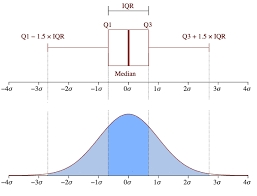

In [ ]:
# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la media")

 El dato 50 es una observación influyente para la media


In [ ]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,25092.753797
std,485.505556
min,20295.710906
25%,25113.438094
50%,25138.728203
75%,25168.546726
max,25193.827250


**Ejercicio**: Repetir el mismo procedimiento (método Jackenife) de detectar los outliers pero con la mediana en lugar de con la media: ¿Qué ocurre? ¿observas variaciones?

In [ ]:
# Método Jackknife con la mediana
phi = np.zeros(len(datos))  # Inicializamos el array phi con ceros

# Bucle para aplicar el método Jackknife y calcular la mediana sin el dato i
for i in range(len(datos)):
    datos_aux = datos
    datos_sin_i = np.delete(datos_aux, i)  # Excluimos el dato en la posición i
    phi[i] = np.median(datos_sin_i)  # Calculamos la mediana sin el dato i

# Mostramos las medianas obtenidas
print("Valores de phi (mediana sin el dato i):")
print(phi)

# Aplicamos el método de la distancia entre cuartiles (IQR)
Q1 = np.quantile(phi, 0.25)
Q3 = np.quantile(phi, 0.75)
IQR = Q3 - Q1
xL = Q1 - 1.5 * IQR  # Límite inferior
xU = Q3 + 1.5 * IQR  # Límite superior

# Detectamos los outliers según los valores de phi (medianas sin un dato)
print("\nDetección de outliers basados en Jackknife y mediana:")
for i in range(len(datos)):
    if phi[i] < xL or phi[i] > xU:
        print(f"El dato {i} es una observación influyente para la mediana")


Valores de phi (mediana sin el dato i):
[20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20555.32841676 20555.32841676
 20555.32841676 20555.32841676 20527.24681931 20527.24681931
 20527.24681931 20527.24681931 20527.24681931 20527.24681931
 20527.24681931 20527.24681931 20527.24681931 20527.24681931
 20527.24681931 20527.24681931 20527.24681931

In [ ]:
# Resumen estadístico de phi
print("\nResumen estadístico de phi (medianas sin cada dato):")
print(pd.DataFrame(phi).describe())


Resumen estadístico de phi (medianas sin cada dato):
                  0
count    100.000000
mean   20541.287618
std       14.111534
min    20527.246819
25%    20527.246819
50%    20541.287618
75%    20555.328417
max    20555.328417


Cuando aplicamos el método Jackknife para detectar outliers con la mediana en lugar de la media, las variaciones que se observan generalmente están relacionadas con la sensibilidad del método a los valores extremos. Aquí te explico lo que ocurre y por qué podría haber variaciones:

1. Diferencia de sensibilidad entre la media y la mediana:
La media es muy sensible a los valores extremos. Si hay outliers grandes o pequeños, estos pueden afectar significativamente el valor de la media. Esto es lo que ocurre cuando usamos la media en el método Jackknife: la exclusión de un dato con un valor extremo cambia la media de forma más notable.

La mediana, por otro lado, es mucho más robusta frente a los valores extremos. Dado que la mediana es el valor central de un conjunto de datos (cuando están ordenados), cambiar un dato que esté muy por encima o por debajo de la mediana no afectará tanto al valor resultante. Esto significa que, cuando utilizamos la mediana, es menos probable que detectemos ciertos outliers porque la mediana es menos sensible a ellos.

2. ¿Qué ocurre al aplicar el método Jackknife con la mediana?:
Al excluir un dato, al calcular la mediana de los demás datos, la mediana no cambia tanto si el dato excluido es un valor extremo. Esto podría hacer que menos datos se consideren outliers en comparación con cuando se usa la media.
Outliers detectados: Si un dato tiene un valor muy alto o muy bajo, su impacto en la mediana será menor. Por lo tanto, es posible que menos observaciones sean identificadas como outliers al usar la mediana, ya que la mediana no es tan afectada por valores atípicos como la media.
3. Variaciones observadas:
Menos sensibilidad a los extremos: Cuando la media se usa en lugar de la mediana, los valores extremos tienen un impacto mayor. Es probable que la media sea más alta o más baja si hay algunos valores muy grandes o muy pequeños, lo que puede hacer que esos valores sean identificados como outliers. Usando la mediana, este efecto se reduce, y es posible que esos mismos valores no sean considerados outliers.

Efecto de la mediana: Si usas la mediana en lugar de la media, es probable que se detecten menos outliers, ya que la mediana no se ve tan afectada por los datos extremos.

4. Ejemplo con el método Jackknife y mediana:
Si aplicas el procedimiento Jackknife para excluir un dato y calcular la mediana, el efecto de un valor muy bajo o muy alto será menos notable en comparación con la media.
En otras palabras, el índice de outliers podría reducirse al usar la mediana debido a que la mediana es mucho más resistente a los datos extremos que la media.
Conclusión:
Variaciones observadas: Cuando utilizas la mediana en el método Jackknife, es probable que haya menos variación en los resultados en comparación con el uso de la media. Esto se debe a la robustez de la mediana frente a los outliers. La mediana no se ve afectada tanto por los valores extremos, lo que puede llevar a una detección menos agresiva de outliers. En cambio, la media es mucho más sensible a esos valores extremos, lo que puede hacer que más observaciones sean consideradas outliers cuando se usa la media en lugar de la mediana.



